In [110]:
import pandas as pd
import matplotlib.pyplot as mplot

## Load in the data

In [65]:
# Read in CSV
raw_train_data = pd.read_csv("../../data/archive/Training_Set/Training_Set/RFMiD_Training_Labels.csv")

In [66]:
raw_train_data.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Determine which conditions (features) have enough data (instances)

In [97]:
disease_presence: dict = {}

for col in raw_train_data.columns:
    # Ignore ID and disease_risk columns
    if col in ["ID", "Disease_Risk"]:
        continue

    value_counts: pd.Series = raw_train_data[col].value_counts()

    # Only interested in those features/conditions where there are positive cases
    if len(value_counts) == 1:
        continue

    pos: int = int(value_counts.get(1))
    neg: int = int(value_counts.get(0))

    min_size: int = 200
    if pos >= min_size and neg >= min_size:
        disease_presence[col] = (neg, pos)

In [98]:
disease_presence

{'DR': (1544, 376), 'MH': (1603, 317), 'ODC': (1638, 282)}

## Filter rows from data so that only healthy and diabetic retinopathy are selected

In [100]:
# Create list of columns that should be checked
disease_cols: list[str] = [col for col in raw_train_data.columns if col != "ID"]

# Create filtering conditions - healthy or only afflicted with DR
healthy: pd.Series = (raw_train_data["Disease_Risk"] == 0)
only_has_dr: pd.Series = (raw_train_data["Disease_Risk"] == 1) & (raw_train_data["DR"] == 1) & (raw_train_data[disease_cols].sum(axis=1) == 2)

# Create filtered data
filtered_train: pd.DataFrame = raw_train_data[healthy | only_has_dr]

## Plot graph to compare healthy vs DR-afflicted

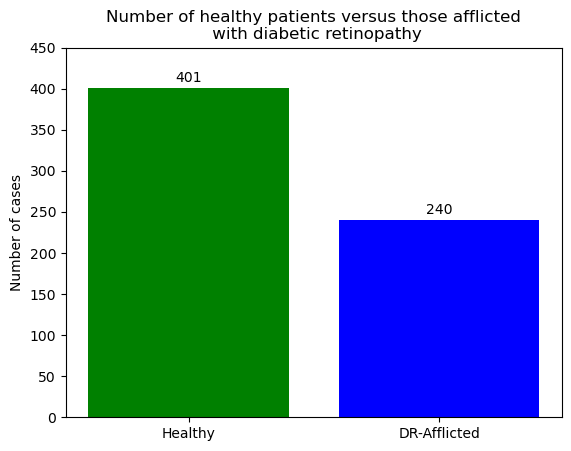

In [159]:
x_vals = ["Healthy", "DR-Afflicted"]
y_vals = filtered_train["DR"].value_counts()

fig, ax = mplot.subplots()
rects = ax.bar(x_vals, y_vals, color=["Green", "Blue"])

ax.set_title("Number of healthy patients versus those afflicted\n with diabetic retinopathy")
ax.set_ylabel("Number of cases")
ax.set_ylim(0, 450)
ax.bar_label(rects, padding=2)

mplot.show()
fig.savefig("../../images/healthy_vs_dr_afflicted.png", format="png", dpi=300)